In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
# Loading data 
soil = pd.read_csv('SSS_raw.csv', delimiter=',')
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 49 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gid       10004 non-null  int64  
 1   objectid  10004 non-null  int64  
 2   sampleno  10004 non-null  object 
 3   X         10004 non-null  float64
 4   Y         10004 non-null  float64
 5   Si02      10004 non-null  float64
 6   Al2O3     10004 non-null  float64
 7   Fe2O3     10004 non-null  float64
 8   TiO2      10004 non-null  float64
 9   CaO       10004 non-null  float64
 10  MgO       10004 non-null  float64
 11  MnO       10004 non-null  float64
 12  Na2O      10004 non-null  float64
 13  K2O       10004 non-null  float64
 14  P2O5      10004 non-null  float64
 15  Ba_ppm    10004 non-null  float64
 16  Ga_ppm    10004 non-null  float64
 17  Sc_ppm    10004 non-null  float64
 18  V_ppm     10004 non-null  float64
 19  Th_ppm    10004 non-null  float64
 20  Pb_ppm    10004 non-null  fl

In [4]:
soil_major = soil.iloc[:,4:14]
soil_minor = soil.iloc[:, 14: ]
log_minor = soil_minor.apply(np.log1p)

In [6]:
#Apply PCA for dimensionality 
# Feature selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Step 4: Apply StandardScaler to the combined DataFrame
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(log_soil), columns=log_soil.columns)
df_scaled.hist(figsize=(18, 12), bins=30, edgecolor='blue')  # bigger figure, more bins
plt.suptitle('Histograms of Log-Transformed Soil Variables', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for suptitle
plt.savefig('Histogram_std_log_soil.png')
plt.show()

NameError: name 'log_soil' is not defined

<Axes: >

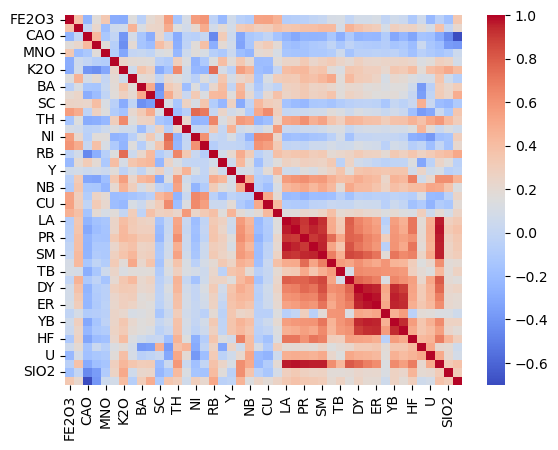

In [31]:
log_soil['SIO2'] = soil['SIO2']
log_soil['AL2O3'] = soil['AL2O3']
soil_corr = log_soil.corr()

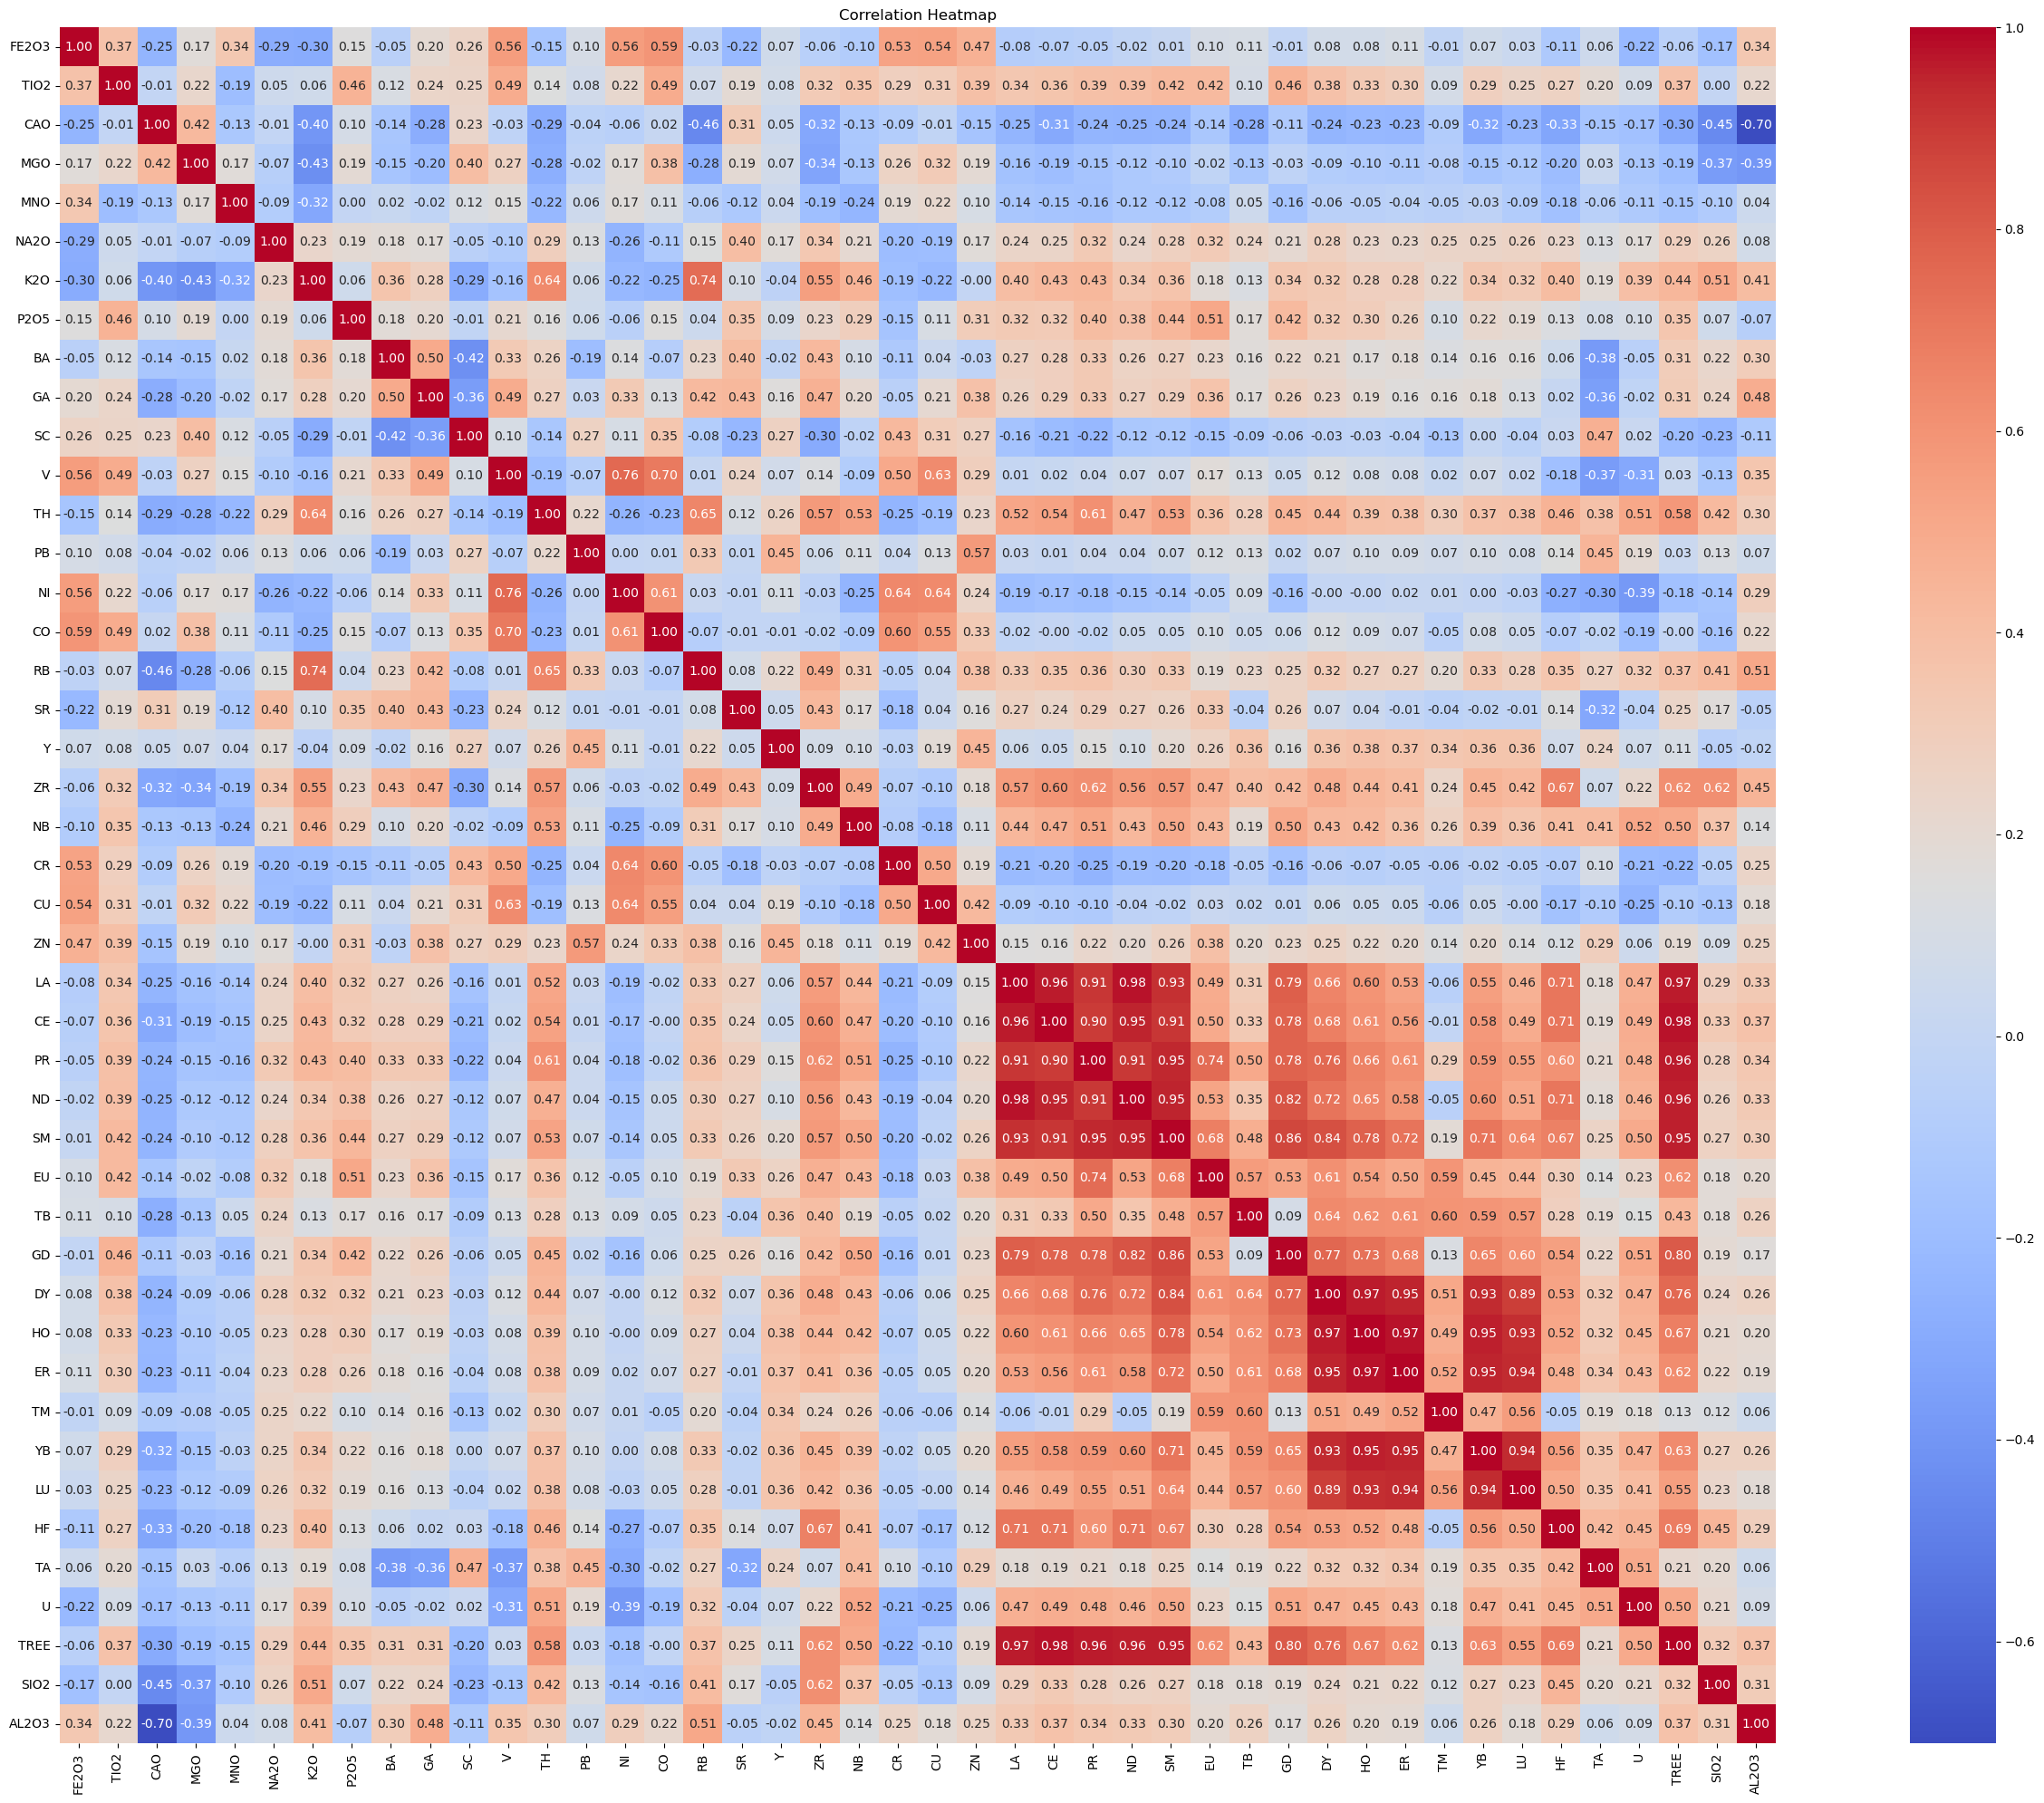

In [61]:
# Set figure size (adjust width & height as needed)
plt.figure(figsize=(30, 20))  # width=12 inches, height=10 inches

# Draw the heatmap
sns.heatmap(soil_corr, cmap='coolwarm', annot=True, fmt=".2f", square=True)

# Optional: add a title
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.savefig('Heatmap_correlation_matrix_soil.png')
plt.show()


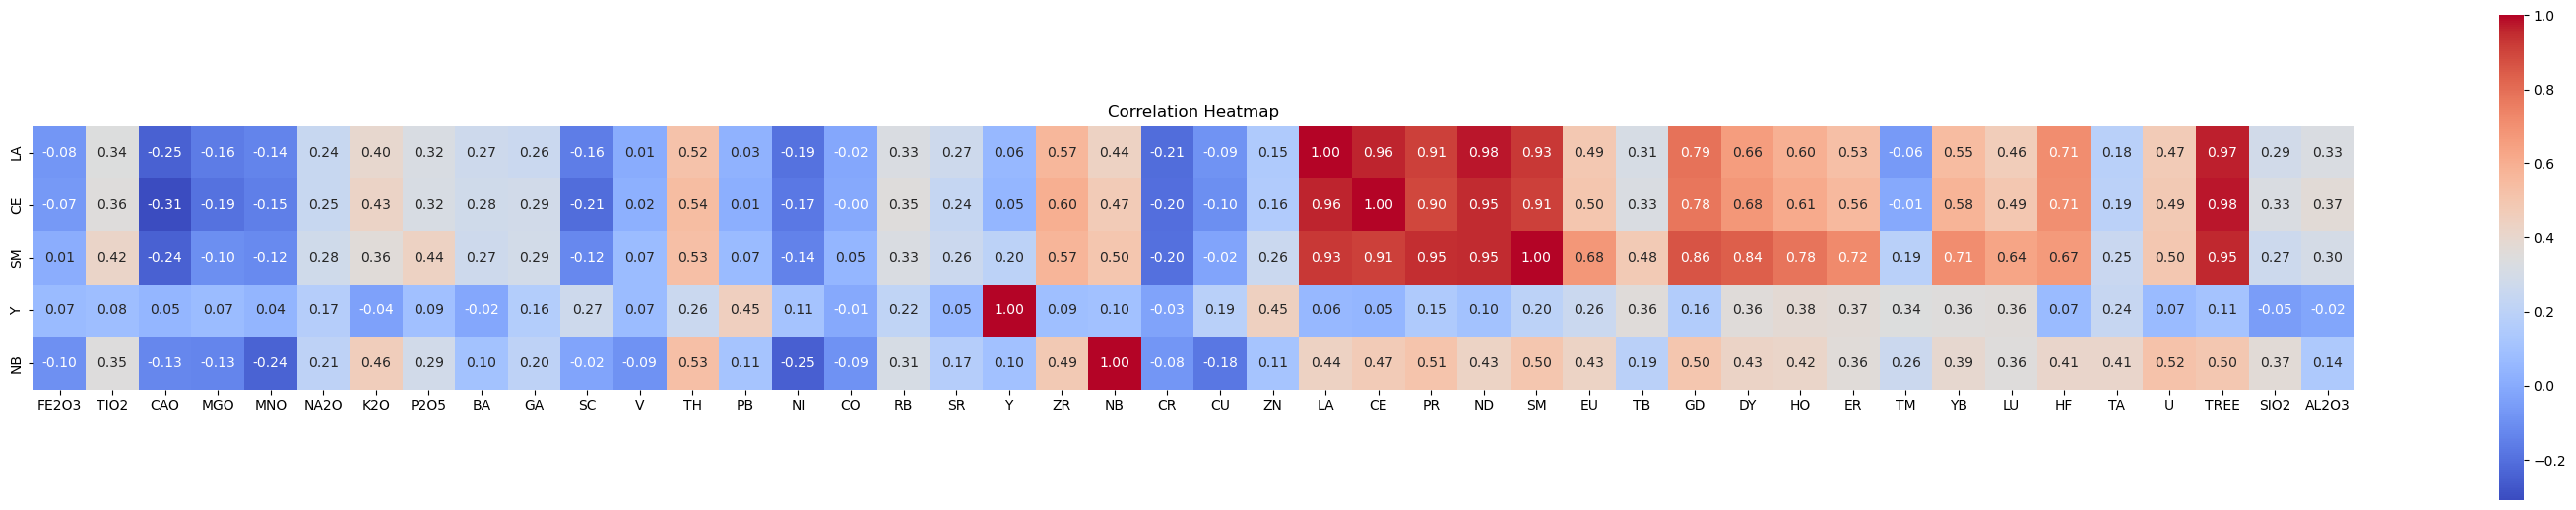

In [62]:
Corr_sam = soil_corr[['LA','CE','SM','Y','NB']]
# Set figure size (adjust width & height as needed)
plt.figure(figsize=(30, 20))  # width=12 inches, height=10 inches

# Draw the heatmap
sns.heatmap(Corr_sam.T, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={'shrink': 0.25}, annot_kws={"size": 10})

# Optional: add a title
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.savefig('Heatmap_correlation_matrix_LACENBY_soil.png')
plt.show()


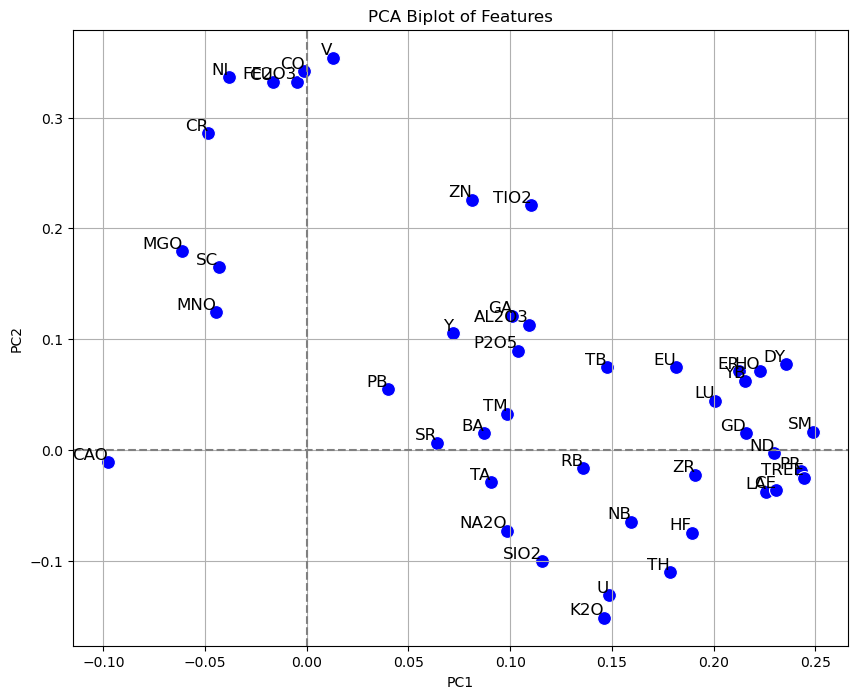

In [63]:
#Apply PCA for dimensionality 
# Feature selection
from sklearn.decomposition import PCA
# Step 4: Apply StandardScaler to the combined DataFrame
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(log_soil), columns=log_soil.columns)

#Apply PCA for dimensionality 
# Feature selection
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_components = pca.fit_transform(df_scaled)
pca_loadings = pca.components_.T  # Loadings for the features

# Create a DataFrame for PCA loadings
pca_loadings_df = pd.DataFrame(pca_loadings, columns=['PC1', 'PC2'], index=df_scaled.columns)

# Plot PCA results with feature loadings
plt.figure(figsize=(10, 8))
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
sns.scatterplot(data=pca_loadings_df, x='PC1', y='PC2', s=100, color='blue')

# Add feature labels
for feature in pca_loadings_df.index:
    plt.text(pca_loadings_df.loc[feature, 'PC1'], pca_loadings_df.loc[feature, 'PC2'], feature,
             fontsize=12, ha='right', va='bottom')

# Add titles and labels
plt.title('PCA Biplot of Features')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.savefig('PCA.png', format='png', bbox_inches='tight')
plt.savefig('PCA_soil.png')
plt.show()
plt.close()

In [65]:
soil.describe().T

,count,mean,std,min,25%,50%,75%,max
OBJECTID,383.0,2691.078329,1202.980545,1200.0000,2200.50000,2364.000,2767.50000,8053.0000
LONGITUDE,383.0,76.884420,0.483816,76.0103,76.46695,76.875,77.27085,77.7472
LATITUDE,383.0,14.894763,0.514206,13.7750,14.46615,14.897,15.34540,15.7339
SIO2,383.0,52.530809,12.494904,0.0000,49.72500,55.200,58.77000,84.2700
AL2O3,383.0,16.865587,4.246149,0.0000,14.32500,17.690,19.92500,25.3200
FE2O3,383.0,6.957859,4.439160,0.0000,4.94000,6.120,7.88000,54.5600
TIO2,383.0,0.679347,0.304448,0.0000,0.50000,0.680,0.83000,2.6300
CAO,383.0,4.828877,6.659873,0.0000,1.30500,2.220,4.91000,41.3800
MGO,383.0,1.872193,2.293595,0.0000,1.03000,1.440,2.24500,41.3100
MNO,383.0,0.135457,0.291718,0.0000,0.05000,0.070,0.12000,3.8500
